<a href="https://colab.research.google.com/github/jakelor/PYTH2/blob/master/The_Bitcoin_Roller_Coaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The Bitcoin Roller Coaster**

Today's presentation uses a dataset that shows multiple cryptocurrencies' prices and will then dive deeper into Bitcion's ups and downs. 

We will explore the prices of multiple cryptocurrencies and see how their prices compare against Bitcoin.

We will then dive deeper into Bitcoin and discover BTC's historial prices.

The begining of the presentation explains where the data is from, quickly explore the data, and then do some data cleaning. 

The second part will focus on the findings using table and chart visuals.

**First I start by importing all the libraries required for this presentation**

In [0]:
import pandas as pd
print("pandas complete")
import numpy as np
print("numpy complete")
import matplotlib.pyplot as plt
print("matplotlib complete")

# set the plots to display in the Jupyter notebook
%matplotlib inline
print("inline  complete")
# change plotting colors per client request
plt.style.use('ggplot')
print("ggplot theme complete")

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (15, 10)
print("figsize complete")
plt.rcParams['font.size'] = 8
print("fontsize complete")

pandas complete
numpy complete
matplotlib complete
inline  complete
ggplot theme complete
figsize complete
fontsize complete


**Then we go import the actual data set**

The csv file contains consolidated finanical information for the top 10 cryptocurrencies by marketcap. 

Attributes include: Currency name (e.g. bitcoin), Date, Open, High, Low, Close, Volume, Marketcap

***Data Dictionary***

*   Currency: Name of currency
*   Date: Date refers to the calendar date for the particular row - 24 hours midnight to midnight
*   Open: Open is what the price was at the beginning of the day
*   High: Highest recorded trading price of the day
*   Low: Lowest recorded trading price of the day
*   Close: Close is what the price was at the end of the day
*   Volume: Volume represents the monetary value of the currency traded in a 24 hour period, denoted in USD
*  Market Cap: Market cap is circulating supply x price of the coin.


In [0]:
## Let's now load the data set! Data downloaded from Kaggle.com
crypto_orig = pd.read_csv('./cryptocurrency-financial-data.zip', compression='zip')
print('data loaded successfully')

## copy the original data into a second df
crypto = crypto_orig.copy()
print('copy successfull')

data loaded successfully
copy successfull


In [0]:
#let's explore the first 10 rows
crypto.head(10)

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
0,tezos,"Dec 04, 2019",1.29,1.32,1.25,1.25,"46,048,752","824,588,509"
1,tezos,"Dec 03, 2019",1.24,1.32,1.21,1.29,"41,462,224","853,213,342"
2,tezos,"Dec 02, 2019",1.25,1.26,1.20,1.24,"27,574,097","817,872,179"
3,tezos,"Dec 01, 2019",1.33,1.34,1.25,1.25,"24,127,567","828,296,390"
4,tezos,"Nov 30, 2019",1.31,1.37,1.31,1.33,"28,706,667","879,181,680"
5,tezos,"Nov 29, 2019",1.28,1.34,1.28,1.31,"32,270,224","867,085,098"
6,tezos,"Nov 28, 2019",1.26,1.35,1.22,1.28,"44,240,281","845,073,679"
7,tezos,"Nov 27, 2019",1.24,1.27,1.16,1.26,"47,723,271","829,672,736"
8,tezos,"Nov 26, 2019",1.24,1.28,1.23,1.24,"54,828,808","822,065,277"
9,tezos,"Nov 25, 2019",1.33,1.33,1.21,1.24,"64,954,006","815,688,075"


In [0]:
#check if data is accurate by comparing 1 random date...
#I will check it agains coinmarketcap.com
crypto[(crypto['Currency'] == 'bitcoin') & (crypto['Date'] == 'Dec 01, 2019')]

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
7239,bitcoin,"Dec 01, 2019","7,571.62","7,571.62","7,291.34","7,424.29","18,720,708,479","134,215,145,410"


**Now it's time for some data cleaning**

We will check if the numbers are floats or objects

In [0]:
#look at the data types for each col
crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28944 entries, 0 to 28943
Data columns (total 8 columns):
Currency      28944 non-null object
Date          28944 non-null object
Open          28944 non-null object
High          28944 non-null object
Low           28944 non-null object
Close         28944 non-null object
Volume        28944 non-null object
Market Cap    28944 non-null object
dtypes: object(8)
memory usage: 1.8+ MB


In [0]:
# time to remove all the commas from the followig commas ... otherwise we can't change them to floats or ints
crypto['Open'] = crypto['Open'].str.replace(',', '')
crypto['High'] = crypto['High'].str.replace(',', '')
crypto['Low'] = crypto['Low'].str.replace(',', '')
crypto['Close'] = crypto['Close'].str.replace(',', '')
crypto['Volume'] = crypto['Volume'].str.replace(',', '')
crypto['Market Cap'] = crypto['Market Cap'].str.replace(',', '')

#let's see if they're gone...
crypto[(crypto['Currency'] == 'bitcoin') & (crypto['Date'] == 'Dec 01, 2019')]

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
7239,bitcoin,"Dec 01, 2019",7571.62,7571.62,7291.34,7424.29,18720708479,134215145410


In [0]:
#we need to change the fields to numeric... we will use map/apply

def convtofloat(val):
  val =  float(val)

  return val

def convtoint(val):
  val =  int(val)

  return val

crypto['Open'] = crypto['Open'].map(convtofloat)
crypto['High'] = crypto['High'].map(convtofloat)
crypto['Low'] = crypto['Low'].map(convtofloat)
crypto['Close'] = crypto['Close'].map(convtofloat)
crypto['Volume'] = crypto['Volume'].map(convtofloat)
crypto['Market Cap'] = crypto['Market Cap'].map(convtoint)

print(crypto.info())
print(crypto.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28944 entries, 0 to 28943
Data columns (total 8 columns):
Currency      28944 non-null object
Date          28944 non-null object
Open          28944 non-null float64
High          28944 non-null float64
Low           28944 non-null float64
Close         28944 non-null float64
Volume        28944 non-null float64
Market Cap    28944 non-null int64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.8+ MB
None
  Currency          Date  Open  High   Low  Close      Volume  Market Cap
0    tezos  Dec 04, 2019  1.29  1.32  1.25   1.25  46048752.0   824588509
1    tezos  Dec 03, 2019  1.24  1.32  1.21   1.29  41462224.0   853213342
2    tezos  Dec 02, 2019  1.25  1.26  1.20   1.24  27574097.0   817872179


**I want to add some date values to make it easier to plot**

In [0]:
# add year
crypto['yyyy'] = pd.to_datetime(crypto['Date']).dt.year
# add month
crypto['mm'] = pd.to_datetime(crypto['Date']).dt.month
# add quarter
crypto['q'] = pd.to_datetime(crypto['Date']).dt.quarter

#let's explore
crypto.head(10)


,Currency,Date,Open,High,Low,Close,Volume,Market Cap,yyyy,mm,q
0,tezos,"Dec 04, 2019",1.29,1.32,1.25,1.25,46048752.0,824588509,2019,12,4
1,tezos,"Dec 03, 2019",1.24,1.32,1.21,1.29,41462224.0,853213342,2019,12,4
2,tezos,"Dec 02, 2019",1.25,1.26,1.20,1.24,27574097.0,817872179,2019,12,4
3,tezos,"Dec 01, 2019",1.33,1.34,1.25,1.25,24127567.0,828296390,2019,12,4
4,tezos,"Nov 30, 2019",1.31,1.37,1.31,1.33,28706667.0,879181680,2019,11,4
5,tezos,"Nov 29, 2019",1.28,1.34,1.28,1.31,32270224.0,867085098,2019,11,4
6,tezos,"Nov 28, 2019",1.26,1.35,1.22,1.28,44240281.0,845073679,2019,11,4
7,tezos,"Nov 27, 2019",1.24,1.27,1.16,1.26,47723271.0,829672736,2019,11,4
8,tezos,"Nov 26, 2019",1.24,1.28,1.23,1.24,54828808.0,822065277,2019,11,4
9,tezos,"Nov 25, 2019",1.33,1.33,1.21,1.24,64954006.0,815688075,2019,11,4


**Ok... enough data cleaning... let's have some fun**

figsize complete
fontsize complete


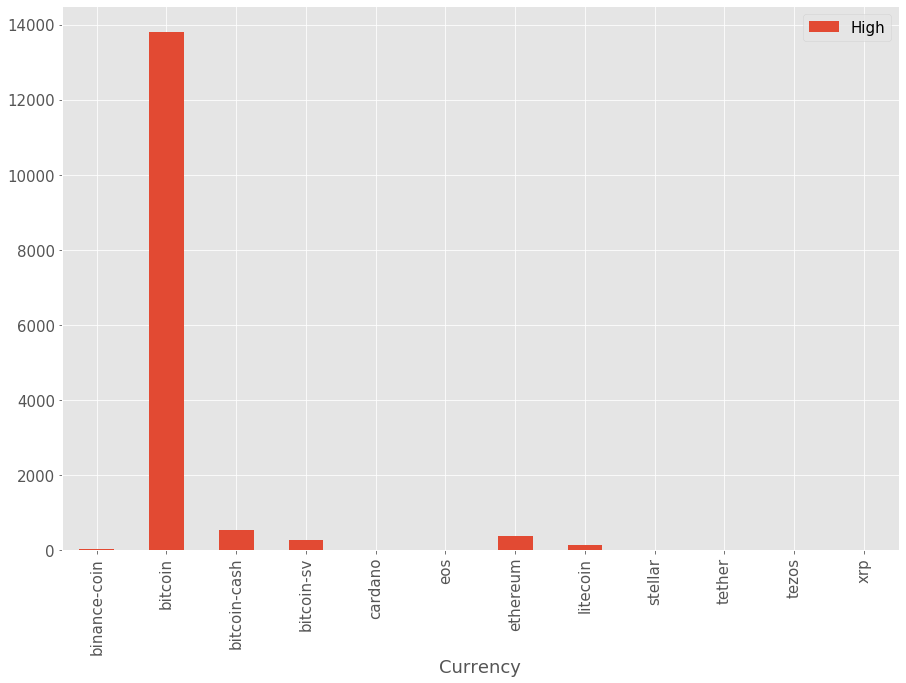

In [0]:
# creating a data frame just for 2019
crypto_2019 = crypto[crypto['yyyy'] == 2019]

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (15, 10)
print("figsize complete")
plt.rcParams['font.size'] = 15
print("fontsize complete")

#let's chart it
crypto_2019.groupby(['Currency']).agg({'High': np.max}).plot(kind='bar')
#crypto_2019.groupby(['Currency']).agg({'High': np.average}).plot(kind='bar')

***ok... bitcoin is too high compared to the others and makes it too hard to read the others... let's exclude btc***

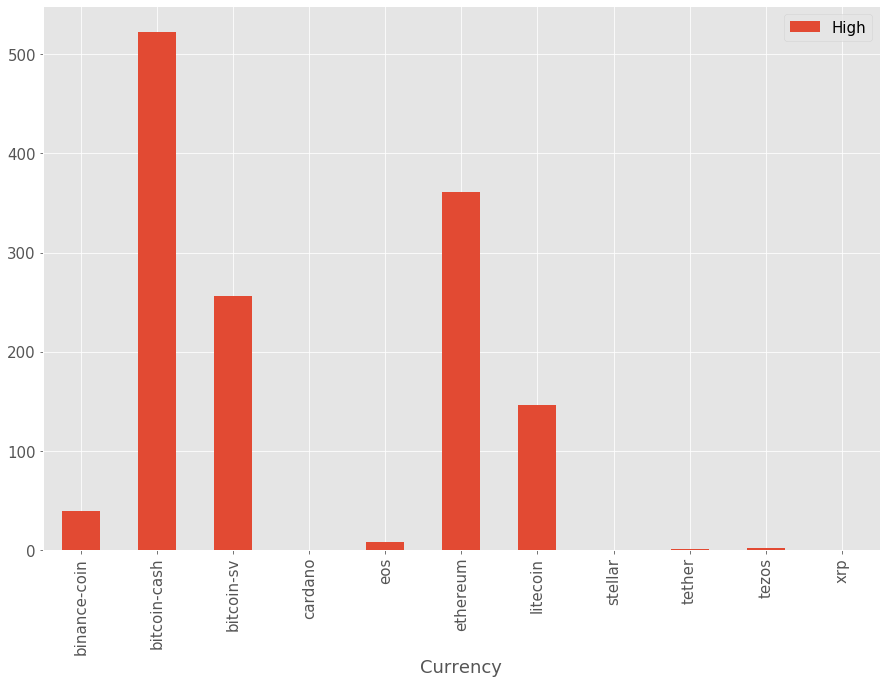

In [0]:
#remove bitcoin from df
crypto_2019_nobtc = crypto_2019[crypto_2019['Currency'] != 'bitcoin']


#let's chart it now
crypto_2019_nobtc.groupby(['Currency']).agg({'High': np.max}).plot(kind='bar')

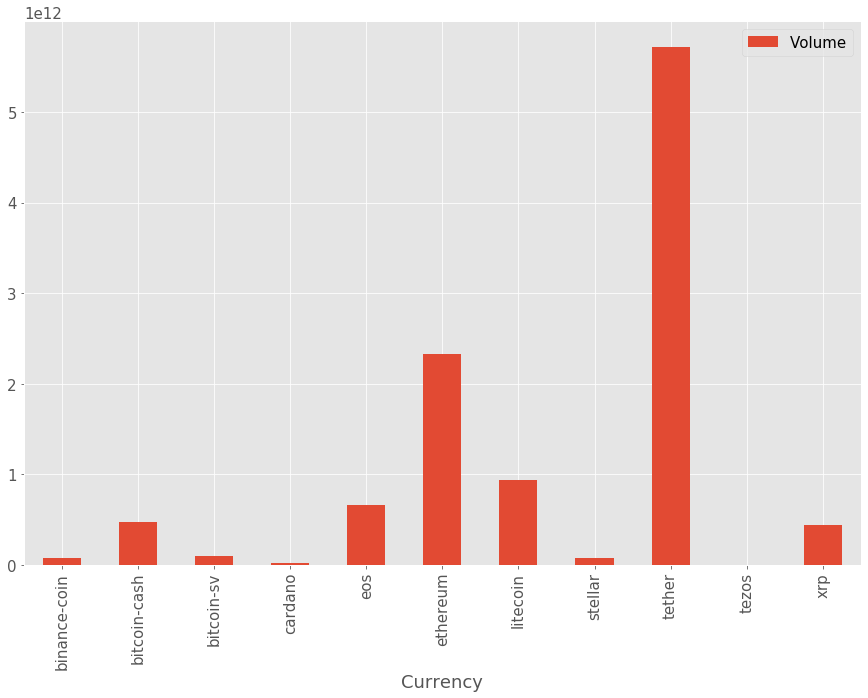

In [0]:
#ok... we know that bitcoin-cash had the highest price in 2019... but who had the most volume
#REMEMBER... WE'RE STILL EXCLUDING BTC!!!
crypto_2019_nobtc.groupby(['Currency']).agg({'Volume': np.sum}).plot(kind='bar')


**The last part is going to focus on BTC only**

In order to do so, i will create a data frame with btc only and remove the other currencies to make it easier to plot. 

In [0]:
#create df with bitcoin only
btc = crypto[crypto['Currency'] == 'bitcoin']

# we then want to make sure not other currencies remain with the value counts
btc['Currency'].value_counts()


bitcoin    2412
Name: Currency, dtype: int64

Before we dig in... let's take a look at the df 

In [0]:
btc

,Currency,Date,Open,High,Low,Close,Volume,Market Cap,yyyy,mm,q
7236,bitcoin,"Dec 04, 2019",7320.13,7539.78,7170.92,7252.03,2.166424e+10,131143073943,2019,12,4
7237,bitcoin,"Dec 03, 2019",7323.98,7418.86,7229.36,7320.15,1.479749e+10,132359942301,2019,12,4
7238,bitcoin,"Dec 02, 2019",7424.04,7474.82,7233.40,7321.99,1.708204e+10,132378982377,2019,12,4
7239,bitcoin,"Dec 01, 2019",7571.62,7571.62,7291.34,7424.29,1.872071e+10,134215145410,2019,12,4
7240,bitcoin,"Nov 30, 2019",7764.06,7836.10,7515.85,7569.63,1.715819e+10,136829391049,2019,11,4
...,...,...,...,...,...,...,...,...,...,...,...
9643,bitcoin,"May 02, 2013",116.38,125.60,92.28,105.21,0.000000e+00,1168517495,2013,5,2
9644,bitcoin,"May 01, 2013",139.00,139.89,107.72,116.99,0.000000e+00,1298954594,2013,5,2
9645,bitcoin,"Apr 30, 2013",144.00,146.93,134.05,139.00,0.000000e+00,1542813125,2013,4,2
9646,bitcoin,"Apr 29, 2013",134.44,147.49,134.00,144.54,0.000000e+00,1603768865,2013,4,2


In [0]:
#I want to reset the index to be on the safe side
btc.reset_index(drop=True, inplace=True)

#let's take a look
btc

,Currency,Date,Open,High,Low,Close,Volume,Market Cap,yyyy,mm,q
0,bitcoin,"Dec 04, 2019",7320.13,7539.78,7170.92,7252.03,2.166424e+10,131143073943,2019,12,4
1,bitcoin,"Dec 03, 2019",7323.98,7418.86,7229.36,7320.15,1.479749e+10,132359942301,2019,12,4
2,bitcoin,"Dec 02, 2019",7424.04,7474.82,7233.40,7321.99,1.708204e+10,132378982377,2019,12,4
3,bitcoin,"Dec 01, 2019",7571.62,7571.62,7291.34,7424.29,1.872071e+10,134215145410,2019,12,4
4,bitcoin,"Nov 30, 2019",7764.06,7836.10,7515.85,7569.63,1.715819e+10,136829391049,2019,11,4
...,...,...,...,...,...,...,...,...,...,...,...
2407,bitcoin,"May 02, 2013",116.38,125.60,92.28,105.21,0.000000e+00,1168517495,2013,5,2
2408,bitcoin,"May 01, 2013",139.00,139.89,107.72,116.99,0.000000e+00,1298954594,2013,5,2
2409,bitcoin,"Apr 30, 2013",144.00,146.93,134.05,139.00,0.000000e+00,1542813125,2013,4,2
2410,bitcoin,"Apr 29, 2013",134.44,147.49,134.00,144.54,0.000000e+00,1603768865,2013,4,2


**Let's plot it by month to see the high and lows**

ggplot theme complete


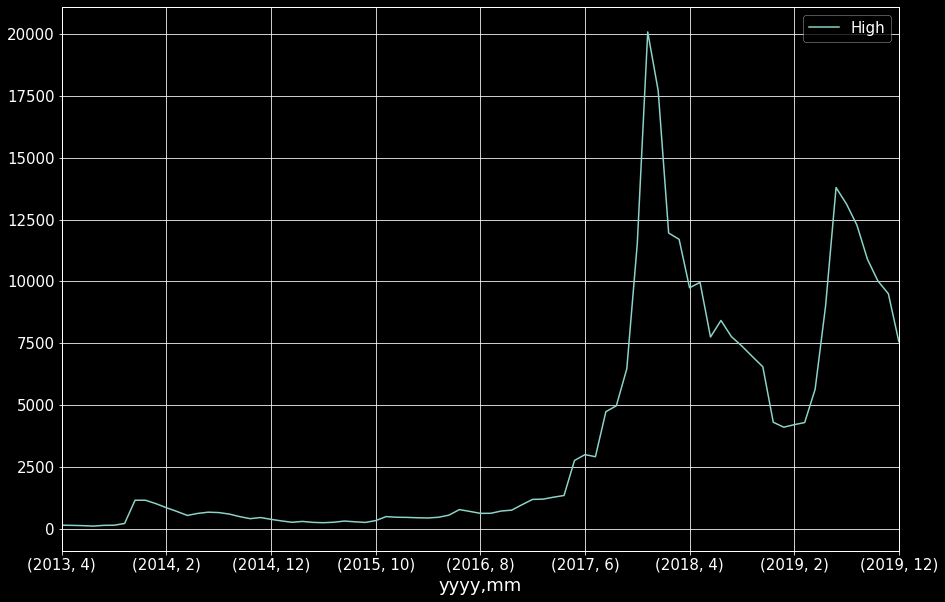

In [0]:
#we want to group it by year and month and take the highest high of given month

# change plotting colors per client request
plt.style.use('dark_background')
print("ggplot theme complete")


btc.groupby(['yyyy', 'mm']).agg({'High': np.max}).plot(kind='line')

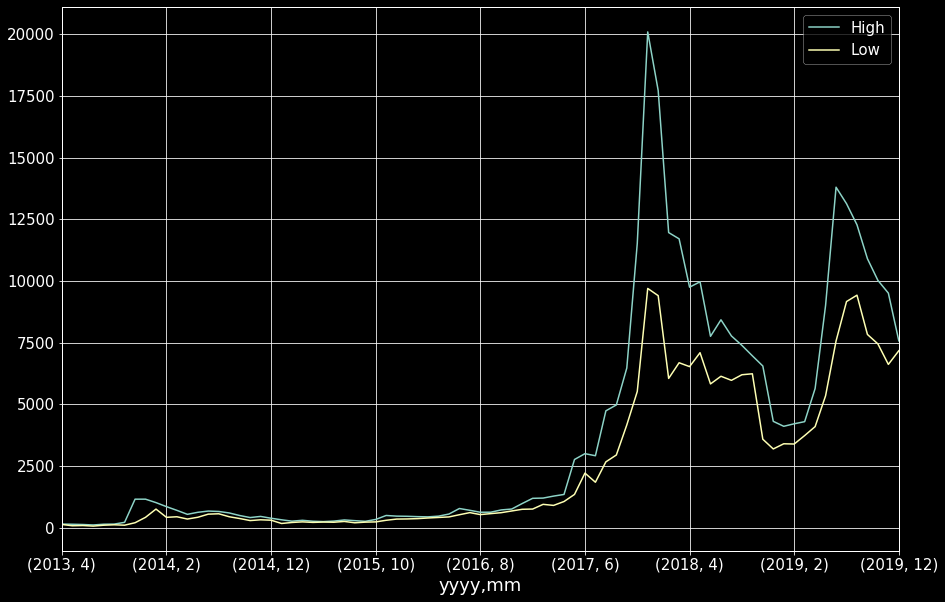

In [0]:
# for any given month, I also want to overlay the lowest amount to show the volatile it is

btc.groupby(['yyyy', 'mm']).agg({'High': np.max, 'Low': np.min}).plot(kind='line')

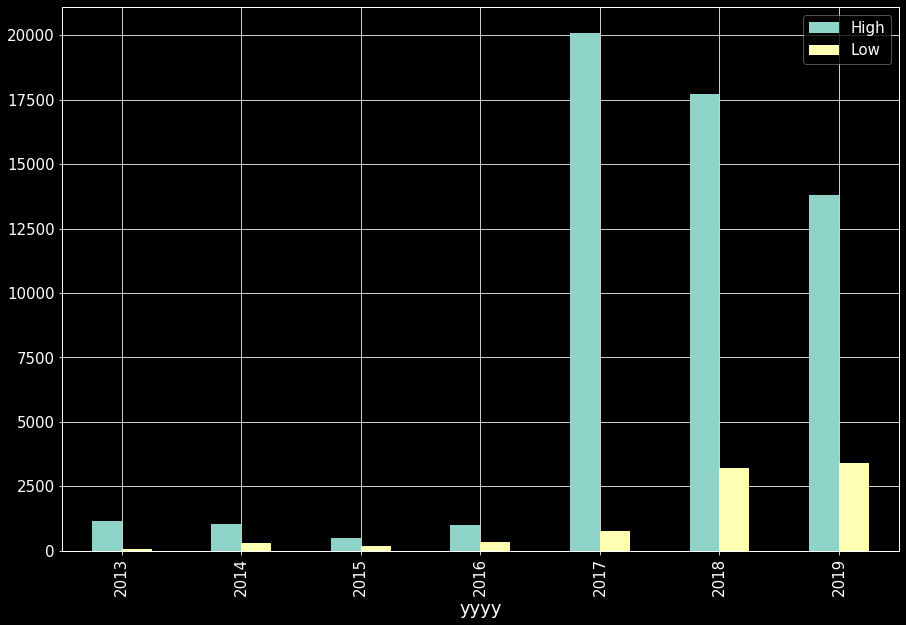

In [0]:
# i want to see the high and the lows BY YEAR

btc.groupby(['yyyy']).agg({'High': np.max, 'Low': np.min}).plot(kind='bar')

**Next I want to see the day with BTC'a highest and lowest price**

In [0]:
#sort the df by high descending and keep one
btc.sort_values(by=['High'], ascending=False).head(1)

,Currency,Date,Open,High,Low,Close,Volume,Market Cap,yyyy,mm,q
717,bitcoin,"Dec 17, 2017",19475.8,20089.0,18974.1,19140.8,1.331460e+10,320576568850,2017,12,4


In [0]:
#how about the lowest price (keep in mind this data is only going back to 2013)
btc.sort_values(by=['Low'], ascending=True).head(1)

,Currency,Date,Open,High,Low,Close,Volume,Market Cap,yyyy,mm,q
2343,bitcoin,"Jul 05, 2013",79.99,80.0,65.53,68.43,0.0,778411179,2013,7,3






**Assume we decided to invest in bitcoin when it was at its lowest (since this data set) and sell when it was at its highest...**

# the following code allows you to enter a number you want to invest

In [0]:
# get input from user
x = int(input("Enter how many dollars you want to invest: "))

# Quick Calcualtion
y = (x / 65.53 * 20089) - x
y = round(y, 2)

#make the variables have thosand seperatort 
x = f'{x:,}' 
y = f'{y:,}' 

#print it and make it user friendly
print(f"""If you would have inversted ${x} on July 05, 2013
and sold it at it's hight on Dec 17, 2017
You would have made ${y}
""")

Enter how many dollars you want to invest: 15000
If you would have inversted $15,000 on July 05, 2013
and sold it at it's hight on Dec 17, 2017
You would have made $4,583,428.2



No one knew about Bitcoin in 2013. So most likely no one invested.
Ok... in Jan 2017, Bitcoin already had some momentum, people knew about it. 
So let's see how much you would have made if you purchased btc on 1/1/2017 and sold it in 12/31/2017... after it fell a lot from it's 12/17 high. 


In [0]:
a = 958.7 #btc[btc['Date'] == 'Jan 01, 2017']['Low']
b = 14377.4 # btc[btc['Date'] == 'Dec 31, 2017']['High']



# get input from user
x = int(input("Enter how many dollars you want to invest: "))

y = (x / a * b) - x
y = (round(y, 2))


#make the variables have thosand seperatort 
x = f'{x:,}' 
y = f'{y:,}'


#print it and make it user friendly
print(f"""If you would have inversted ${x} on Jan 01, 2017
and sold it at it's hight on Dec 17, 2017
You would have made ${y}
""")

Enter how many dollars you want to invest: 15000
If you would have inversted $15,000 on Jan 01, 2017
and sold it at it's hight on Dec 17, 2017
You would have made $209,951.5

